In [6]:
# Imports
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.metrics import roc_curve

Class 1 length:  3000
Class 2 length:  1500


(array([ 17.,  62., 214., 368., 400., 274., 126.,  34.,   4.,   1.]),
 array([-3.05693306, -1.6331557 , -0.20937834,  1.21439902,  2.63817639,
         4.06195375,  5.48573111,  6.90950847,  8.33328583,  9.7570632 ,
        11.18084056]),
 <a list of 10 Patch objects>)

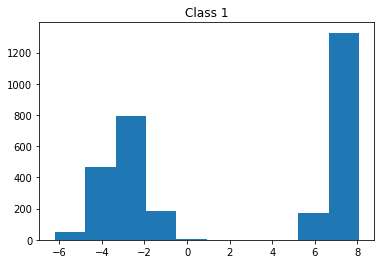

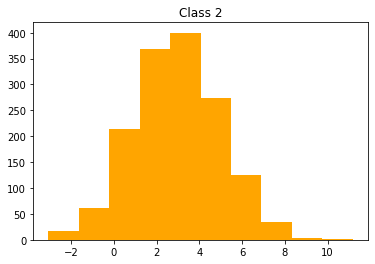

In [23]:
# Load data
data = []
class1 = []
class2 = []
with open('data_3_5.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        data.append([float(row[0]), float(row[1])])
        if row[1] == '1':
            class1.append(float(row[0]))
        else:
            class2.append(float(row[0]))
            
print("Class 1 length: ", len(class1))
print("Class 2 length: ", len(class2))

### Problem 5A

In [ ]:
# Construct normal distributions for classes 1 and 2
mu1, sigma1 = norm.fit(class1)
mu2, sigma2 = norm.fit(class2)

print("Mu 1: ", mu1, "Sigma 1: ", sigma1)
print("Mu 2: ", mu2, "Sigma 2: ", sigma2)

# Bayes Classifier: probability that a datapoint belongs in class C given X
# is proportional to the probability of seeing this data point given we are in class C
# times the probability of class C occuring.

# Sooo... sample each X from each distribution, then multiply by the length of that
# distribution. Whichever probability is higher, choose that class.

dist_c1 = norm(mu1, sigma1)
dist_c2 = norm(mu2, sigma2)

# Plot PDFs of each class
x = np.linspace(-13, 17, 100)
plt.plot(x, dist_c1.pdf(x))
plt.plot(x, dist_c2.pdf(x))

len_c1 = len(class1)
len_c2 = len(class2)
len_data = len(data)
predicted = [0, 0] # List to keep track of number of points predicted in each class

tp = 0
fp = 0
tn = 0
fn = 0

target_scores = []

for d in data:
    prob_c1 = dist_c1.pdf(d[0]) * len_c1 / len_data
    prob_c2 = dist_c2.pdf(d[0]) * len_c2 / len_data
    if prob_c1 > prob_c2: # If likelihood of coming from class 1 is higher, predict class 1
        predicted[0] += 1 # Class 1
        target_scores.append(prob_c1)
        # Populate confusion matrix
        if d[1] == 1:
            tp += 1
        else:
            fp += 1
    else:
        predicted[1] += 1 # Class 2
        target_scores.append(prob_c2)
        # Populate confusion matrix
        if d[1] == 0:
            tn += 1
        else:
            fn += 1

# Print statistics about the data
print("Predicted class 1: ", predicted[0])
print("Predicted class 2: ", predicted[1])
print("TPR: ", tp / (tp + fn))
print("FPR: ", tn / (tn + fp))


### Problem 5B
The model does not fit the data all that well because the distributions of each class of data overlap so heavily, as shown in the figure above. The PDFs for Class 1 and Class 2 of the data overlap heavily and have very different shapes. Class 1 is quite spread out from its mean of 1.99, with a variance of 5.04, while Class 2 is concentrated around its mean at 2.97 with a variance of only 1.98. This means that the two PDFs overlap significantly in the range (0, 5), and the model predicts false positives (Class 2) in this range because Class 2's PDF is concentrated in this range. No false negatives occur because there is no point where Class 1 is more likely than Class 2.

### Problem 5C & 5D

Text(0, 0.5, 'TPR')

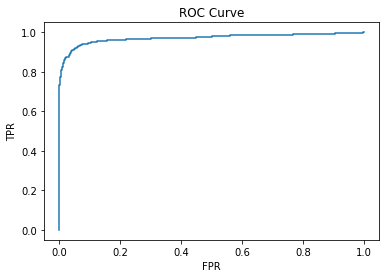

In [18]:
# 3C: Construct and plot ROC curve based on Bayes classifier above
y = np.array([i[1] for i in data])
scores = np.array(target_scores)
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
fig1, ax1 = plt.subplots()
ax1.plot(fpr, tpr)
plt.title(label="ROC Curve", loc='center')
plt.xlabel('FPR')
plt.ylabel('TPR')

# 3D: Build ROC empirically !!!TODO

### Problem 5E
As shown above, Class 1 does not follow a normal distribution, and treating it as a normal distribution results in poor classification performance. Better performance could be achieved by modeling Class 1 as some sort of bimodal distribution.